In [106]:
### READ THE README.md FILE

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')

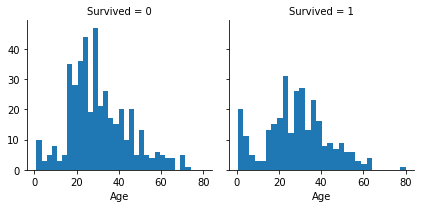

In [6]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=30);

In [108]:
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
nullvalue=titanic.isnull().sum()
nullvalue

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

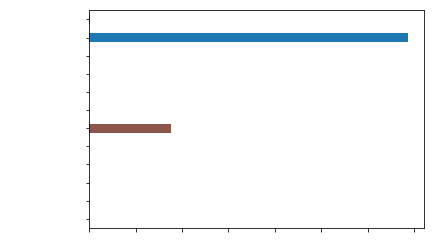

In [110]:
# cabins has the must null value 
nullvalue.plot(kind='barh');
plt.ylabel('number of null value',color='white');
plt.xticks(color='white');
plt.yticks(color='white');

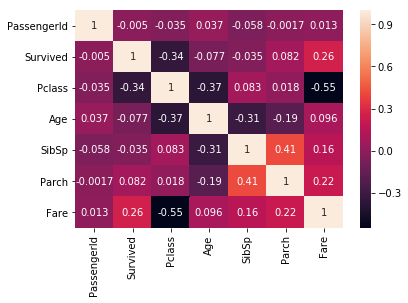

In [111]:
sns.heatmap(titanic.corr(),annot=True)
plt.yticks(rotation = 0);

In [112]:
# 3. Delete all rows where `Embarked` is empty
# titanic.Embarked= titanic['Embarked'].notnull() 
titanic.loc[titanic['Embarked'].isnull()]
titanic['Embarked'].fillna('S', inplace=True)
titanic['Cabin'].fillna('**¯\\_(ツ)_/¯**', inplace=True)
titanic['Cabin'].fillna('**¯\\_(ツ)_/¯**', inplace=True)
titanic['Age'] = titanic.groupby(["Sex", 'Pclass'])["Age"]\
.transform(lambda x: x.fillna(x.mean()))

# titanic.isnull().sum()

In [113]:
titanic['FamilyCount'] = titanic.SibSp + titanic.Parch

In [114]:
# titanic.Name= 
titanic['IsReverend']=titanic['Name'].str.find('Rev')
titanic.IsReverend =titanic.IsReverend.replace(-1,0)
titanic['IsReverend'].values[titanic['IsReverend'].values > 0] = 1


In [115]:

titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1


In [116]:
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1


In [117]:
# # Change the maximum number of rows and columns printed ('None' means unlimited).
# pd.set_option('max_rows', None)     # Default is 60 rows
# pd.set_option('max_columns', None)  # Default is 20 columns

In [118]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1


In [119]:
surviul_rate = titanic.Survived.sum() / len(titanic['Survived'])*100
print(f'{surviul_rate}%')

38.38383838383838%


In [120]:
# none of the rev survaived
titanic[(titanic.IsReverend ==1) & (titanic.Survived==1)]



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male


In [121]:
capt=titanic['Name'].str.find('Capt')  
capt
titanic.iloc[745]

PassengerId                             746
Survived                                  0
Pclass                                    1
Name           Crosby, Capt. Edward Gifford
Age                                      70
SibSp                                     1
Parch                                     1
Ticket                            WE/P 5735
Fare                                     71
Cabin                                   B22
FamilyCount                               2
IsReverend                                0
Embarked_C                                0
Embarked_Q                                0
Embarked_S                                1
Sex_female                                0
Sex_male                                  1
Name: 745, dtype: object

In [122]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'


# Lets create a new column for the titles
titanic['Title'] = titanic['Name'].map(lambda x: get_title(x))
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1,Mr


In [123]:
# titanic.groupby('Sex_female')['Survived'].sum() / len(titanic['Survived'])*100
pd.crosstab([titanic.Sex_female,titanic.Sex_male],titanic.Survived, normalize='index').mul(100)


,Survived,0,1
Sex_female,Sex_male,,
0,1,81.109185,18.890815
1,0,25.796178,74.203822


In [124]:
classs =pd.crosstab(titanic.Pclass, titanic.Survived, normalize='index').mul(100)
classs
# titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [125]:
# titanic.groupby('Cabin')['Survived'].sum() /len(titanic['Survived'])*100
pd.crosstab(titanic.Cabin, titanic.Survived, normalize='index').mul(100)

Survived,0,1
Cabin,,
**¯\_(ツ)_/¯**,70.014556,29.985444
A10,100.000000,0.000000
A14,100.000000,0.000000
A16,0.000000,100.000000
A19,100.000000,0.000000
A20,0.000000,100.000000
A23,0.000000,100.000000
A24,100.000000,0.000000
A26,0.000000,100.000000


In [126]:
pd.crosstab(titanic.Age, titanic.Survived, normalize='index').mul(100)





Survived,0,1
Age,,
0.42,0.000000,100.000000
0.67,0.000000,100.000000
0.75,0.000000,100.000000
0.83,0.000000,100.000000
0.92,0.000000,100.000000
1.00,28.571429,71.428571
2.00,70.000000,30.000000
3.00,16.666667,83.333333
4.00,30.000000,70.000000


In [127]:
titanic.head()
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
    Compute a simple cross-tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    aggfunc : function, optional
        If specified, requires `values` be specified as well
    rownames : sequence, default None
        If passed, must match number of row arrays passed
    colnames : sequence, default None
 

In [128]:
n =pd.crosstab([titanic.Embarked_C, titanic.Embarked_Q,titanic.Embarked_S], titanic.Survived ,normalize='index').mul(100)
n

Survived                                  0          1
Embarked_C Embarked_Q Embarked_S                      
0          0          1           66.099071  33.900929
           1          0           61.038961  38.961039
1          0          0           44.642857  55.357143

In [129]:


under12 = titanic[titanic['Age']< 12].groupby('Pclass')['Survived'].sum()/titanic[titanic['Age']< 12].groupby('Pclass')['PassengerId'].count() * 100
under12


Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [130]:
titanic[titanic['Survived']==0].sort_values('Fare', ascending=False)
print(' Mr. Charles Alexander had ticket cost 263.0000  and die ):')

 Mr. Charles Alexander had ticket cost 263.0000  and die ):


In [131]:
survivalRateByFamily = titanic.groupby('FamilyCount')['Survived'].sum()/titanic[titanic['FamilyCount']>=1].groupby('FamilyCount')['PassengerId'].count() * 100
survivalRateByFamily

FamilyCount
0           NaN
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [132]:
survivalRatewithoutFamily = titanic.groupby('FamilyCount')['Survived'].sum()/titanic[titanic['FamilyCount']==0].groupby('FamilyCount')['PassengerId'].count() * 100
survivalRatewithoutFamily 

FamilyCount
0     30.353818
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
10          NaN
dtype: float64

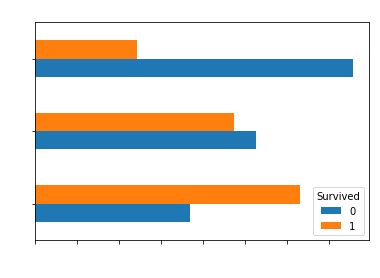

In [133]:
classs.plot(kind='barh');
plt.title('Survaival Rate for each class', color='white')
plt.ylabel('Classes',color='white');
plt.xlabel('Survaival Rate ',color='white');

plt.xticks(color='white');
plt.yticks(color='white');

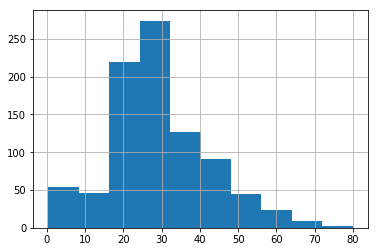

In [134]:
titanic.Age.hist();

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title'],
      dtype='object')

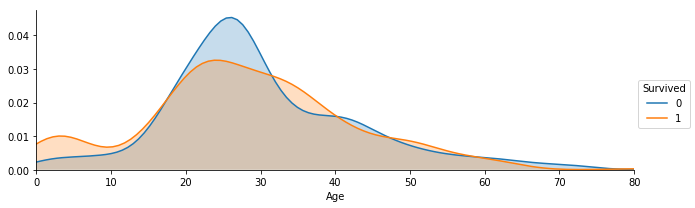

In [135]:
age_class = sns.FacetGrid(titanic, hue='Survived', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "Age", shade=True).add_legend()
age_class.set(xlim=(0, 80));
titanic.columns

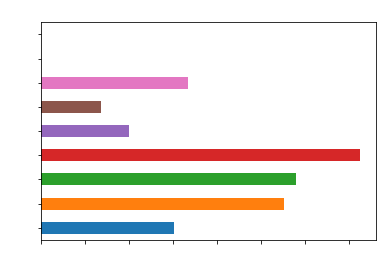

In [136]:
s = titanic.groupby('FamilyCount')['Survived'].sum()/titanic.groupby('FamilyCount')['PassengerId'].count() * 100

plt.title('chances of survival by family',color='white');
plt.xlabel('Rate of survival',color='white')
plt.ylabel('family  count',color='white')

plt.xticks(color='white')
plt.yticks(color='white')


s.plot(kind='barh');


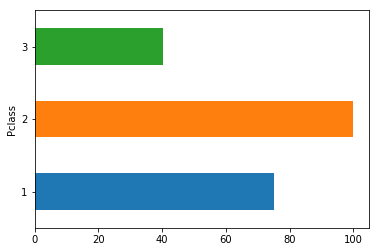

In [137]:

under12.plot(kind='barh');

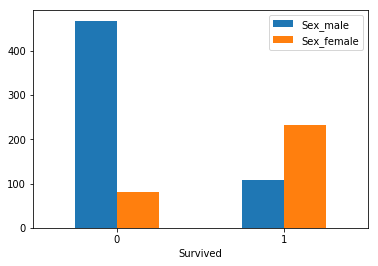

In [138]:
titanic.groupby('Survived')['Sex_male','Sex_female'].sum().plot(kind='bar')
plt.xticks(rotation=0);


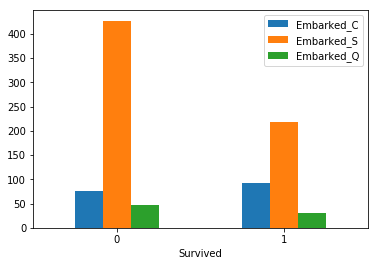

In [139]:
titanic.groupby('Survived')['Embarked_C','Embarked_S' ,'Embarked_Q'].sum().plot(kind='bar')
plt.xticks(rotation=0);


In [140]:
titanic['Fare'].skew()

4.787316519674893

In [141]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658,-0.040143,0.012698,-0.001205,-0.033606,0.022204,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,0.016639,-0.064988,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,0.065997,-0.030413,-0.243292,0.221009,0.074053,-0.131900,0.131900
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.262041,0.085902,0.041504,-0.084069,0.016545,-0.112851,0.112851
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.890712,-0.026622,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.783111,-0.021967,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.217138,-0.023031,0.269335,-0.117216,-0.162184,0.182333,-0.182333
FamilyCount,-0.040143,0.016639,0.065997,-0.262041,0.890712,0.783111,0.217138,1.000000,-0.029170,-0.046215,-0.058592,0.077359,0.200988,-0.200988
IsReverend,0.012698,-0.064988,-0.030413,0.085902,-0.026622,-0.021967,-0.023031,-0.029170,1.000000,-0.039691,0.023515,0.019972,-0.060741,0.060741
Embarked_C,-0.001205,0.168240,-0.243292,0.041504,-0.059528,-0.011069,0.269335,-0.046215,-0.039691,1.000000,-0.148258,-0.782742,0.082853,-0.082853


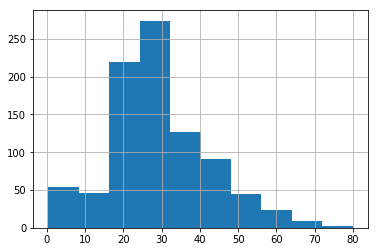

In [142]:
titanic.Age.hist();

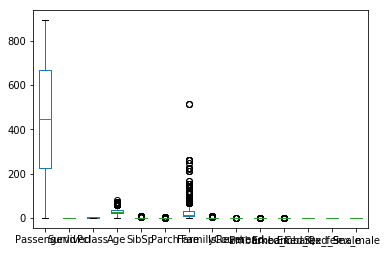

In [143]:
titanic.plot.box(); 

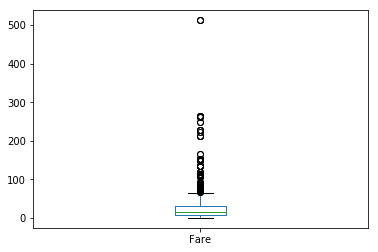

In [144]:
titanic['Fare'].plot(kind='box');

In [145]:
titanic['Fare'].kurt()
titanic.std()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208,0.904602,0.006734,0.188552,0.086420,0.725028,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429,1.613459,0.081830,0.391372,0.281141,0.446751,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
titanic[titanic['Survived']==0].sort_values('Age', ascending=False)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
851,852,0,3,"Svensson, Mr. Johan",74.0,0,0,347060,7.7750,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",71.0,0,0,PC 17609,49.5042,**¯\_(ツ)_/¯**,0,0,1,0,0,0,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",71.0,0,0,PC 17754,34.6542,A5,0,0,1,0,0,0,1,Mr
116,117,0,3,"Connors, Mr. Patrick",70.5,0,0,370369,7.7500,**¯\_(ツ)_/¯**,0,0,0,1,0,0,1,Mr
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0000,B22,2,0,0,0,1,0,1,Capt
672,673,0,2,"Mitchell, Mr. Henry Michael",70.0,0,0,C.A. 24580,10.5000,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1,Mr
33,34,0,2,"Wheadon, Mr. Edward H",66.0,0,0,C.A. 24579,10.5000,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1,Mr
456,457,0,1,"Millet, Mr. Francis Davis",65.0,0,0,13509,26.5500,E38,0,0,0,0,1,0,1,Mr
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",65.0,0,1,113509,61.9792,B30,1,0,1,0,0,0,1,Mr
280,281,0,3,"Duane, Mr. Frank",65.0,0,0,336439,7.7500,**¯\_(ツ)_/¯**,0,0,0,1,0,0,1,Mr


In [147]:
titanic[titanic['Survived']==1].sort_values('Age', ascending=False)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",80.00,0,0,27042,30.0000,A23,0,0,0,0,1,0,1,Mr
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",63.00,1,0,13502,77.9583,D7,1,0,0,0,1,1,0,Miss
483,484,1,3,"Turkula, Mrs. (Hedwig)",63.00,0,0,4134,9.5875,**¯\_(ツ)_/¯**,0,0,0,0,1,1,0,Mrs
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.00,0,0,113572,80.0000,B28,0,0,0,0,1,1,0,Mrs
570,571,1,2,"Harris, Mr. George",62.00,0,0,S.W./PP 752,10.5000,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1,Mr
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.00,1,0,110813,75.2500,D37,1,0,1,0,0,1,0,Mrs
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",60.00,1,1,13567,79.2000,B41,2,0,1,0,0,0,1,Mr
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.00,0,1,PC 17582,153.4625,C125,1,0,0,0,1,1,0,Mrs
11,12,1,1,"Bonnell, Miss. Elizabeth",58.00,0,0,113783,26.5500,C103,0,0,0,0,1,1,0,Miss
195,196,1,1,"Lurette, Miss. Elise",58.00,0,0,PC 17569,146.5208,B80,0,0,1,0,0,1,0,Miss


In [148]:
# titanic.groupby('Survived')['Pclass'].plot(kind='bar')


In [149]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title'],
      dtype='object')